In [189]:
import numpy as np
import scipy.stats as st
from scipy.stats import kstest, ttest_1samp, ttest_ind
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-danger">

<b>Задание 1</b>

Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон в материалах к домашнему заданию. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [6]:
def if_normal(data, pval=0.05):

    # Тест Колмогорова-Смирнова
    
    if kstest(data, 'norm')[1]>=pval:
        return "распределение нормальное"
    elif kstest(data, 'norm')[1]<pval:
        return "распределение ненормальное"
    else:
        return "введенные данные некорректны"

In [7]:
def if_normal_popravka(data, pval=0.01):

    # Тест Колмогорова-Смирнова с поправкой Лиллиефорса
    
    if lilliefors(data)[1]>=pval:
        return "распределение нормальное"
    elif lilliefors(data)[1]<pval:
        return "распределение ненормальное"
    else:
        return "введенные данные некорректны"

<div class="alert alert-warning">
<b>Задание 2</b>

Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен
α
= 0.001.

Покажите различия визуально
Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [179]:
def is_stat_dif_two(np_arr1, np_arr2, alfa=0.001):
    
    # plt.hist(woman_height, bins=120, color='#C71851', alpha=0.7, density=True) 
    # plt.hist(man_height, bins=120, color='#708090', alpha=0.7, density=True)

    plt.boxplot(np_arr1)
    plt.boxplot(np_arr2)
    
    p = ttest_ind(np_arr1, np_arr2)[1]
    print(p)
    if p>=alfa:
      return 'различия незначительны'
    elif p<alfa:
        return 'выборки статистически различаются'
    else:
        return 'введены некорректные данные'

In [185]:
def is_stat_dif(man_height, woman_height, alfa=0.001):
    
    # plt.hist(woman_height, bins=120, color='#C71851', alpha=0.7, density=True) 
    # plt.hist(man_height, bins=120, color='#708090', alpha=0.7, density=True)

    plt.boxplot(woman_height)
    plt.boxplot(man_height)
    
    p = ttest_1samp(man_height, woman_height.mean())[1]
    print(p)
    if p>=alfa:
      return 'различия незначительны'
    elif p<alfa:
        return 'выборки статистически различаются'
    else:
        return 'введены некорректные данные'

In [151]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)

0.0


'выборки статистически различаются'

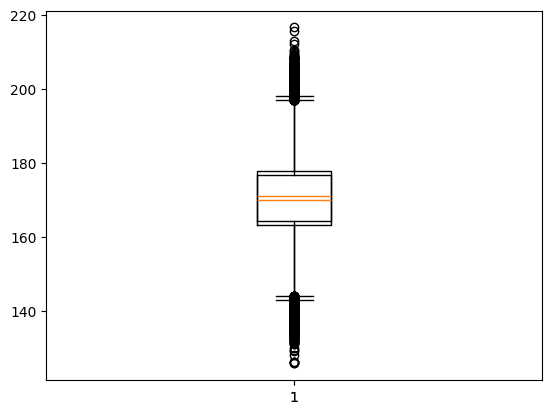

In [174]:
is_stat_dif(mens, womens, 0.001)

Не является результат полезным с практической точки зрения, потому что разница в 1 см при формировании данных сама по себе составляет только 0.5%, что уже вызывает вопрос, насколько эта разница, если бы это были реальные данные, является статистически значимой...... (сама не поняла чего написала)

<div class="alert alert-info">
<b>Задание 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.
В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

распределение нормальное
распределение ненормальное
0.635016563154672
различия незначительны
0.526397730734845
различия незначительны


<Axes: >

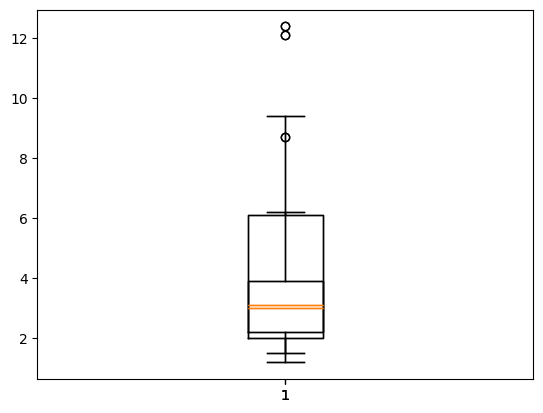

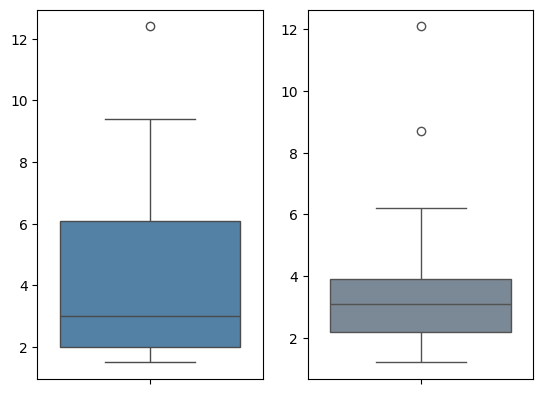

In [245]:
test_team = np.array([6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1])
developer_team = np.array([2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4])

print(if_normal_popravka(test_team))
print(if_normal_popravka(developer_team))

print(is_stat_dif_two(test_team, developer_team, 0.05))
print(is_stat_dif(test_team, developer_team, 0.05))

fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=test_team, ax=axs[0], color='#4582B4')
sns.boxplot(data=developer_team, ax=axs[1], color='#778899')

In [254]:
stat, p = st.mannwhitneyu(test_team, developer_team)
if p >= 0.05:
    print(f'Не отклоняем нулевую гипотезу: p-value={p: .3f}')
    print(f'Распределения вероятно одинаковые')
if p <0.05:
    print(f'Отклоняем нулевую гипотезу: p-value={p: .3f}')
    print(f'Распределения вероятно различаются')

Не отклоняем нулевую гипотезу: p-value= 0.823
Распределения вероятно одинаковые


In [255]:
stat, p = st.wilcoxon(test_team, developer_team)
if p >= 0.05:
    print(f'Не отклоняем нулевую гипотезу: p-value={p: .3f}')
    print(f'Распределения вероятно одинаковые')
if p <0.05:
    print(f'Отклоняем нулевую гипотезу: p-value={p: .3f}')
    print(f'Распределения вероятно различаются')

Не отклоняем нулевую гипотезу: p-value= 0.796
Распределения вероятно одинаковые


<div class="alert alert-success">
<b>Задание 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.
В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [166]:
only_breast = np.array([794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1])
only_formula = np.array([898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9])
both = np.array([976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3])

In [260]:
print(len(only_breast), len(only_formula), len(both))

17 19 23


In [275]:
print(f'{st.mannwhitneyu(only_breast, only_formula)[1]: .5f}')
print(f'{st.mannwhitneyu(only_breast, both)[1]: .5f}')
print(f'{st.mannwhitneyu(only_formula, both)[1]: .5f}')

 0.00001
 0.02861
 0.00001


ну получается, что выборки статистически различаются, т.е. отклоняем 0 гипотезу о том, что набор веса не зависит от способа кормления

распределение нормальное
распределение нормальное
распределение нормальное
1.5674024199277877e-07
выборки статистически различаются
0.04315143345605874
выборки статистически различаются
1.1692474866673824e-06
выборки статистически различаются


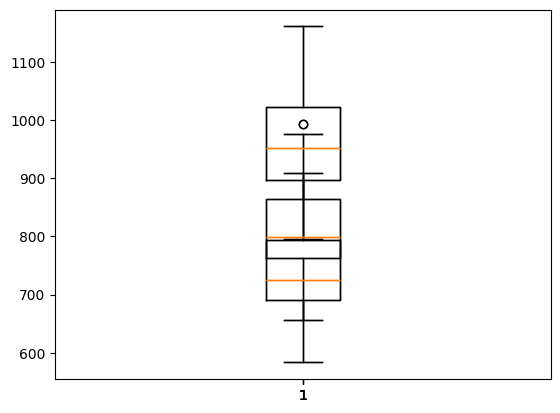

In [188]:
print(if_normal_popravka(only_breast))
print(if_normal_popravka(only_formula))
print(if_normal_popravka(both))

print(is_stat_dif_two(only_breast, only_formula, 0.05))
print(is_stat_dif_two(only_breast, both, 0.05))
print(is_stat_dif_two(only_formula, both, 0.05))

<Axes: >

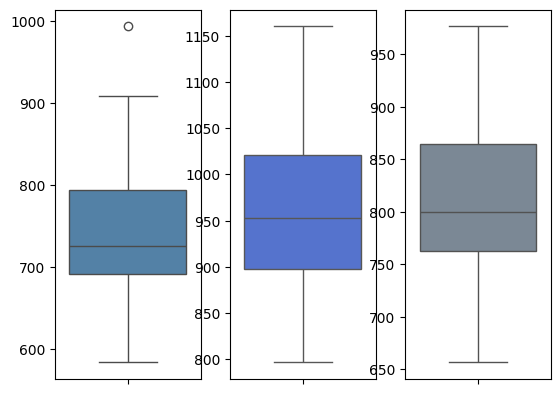

In [203]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(data=only_breast, ax=axs[0], color='#4582B4')
sns.boxplot(data=only_formula, ax=axs[1], color='#4169E1')
sns.boxplot(data=both, ax=axs[2], color='#778899')

Получается дети лучше растут что ли на искусственном вскармливании..... 
Меньше всего различаются выборки на грудном и смешанном вскармливании....

<div class="alert alert-danger">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [205]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [264]:
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
    print('Это правда эксперт!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")

p-value = 0.130992, уровень значимости = 0.05
На уровене значимости 0.05, мы не отвергаем нулевые гипотезы. Они независимы.


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube = np.arange([1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125])
instagram = np.arange([2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.])
facebook = np.arange([2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.])

<Axes: >

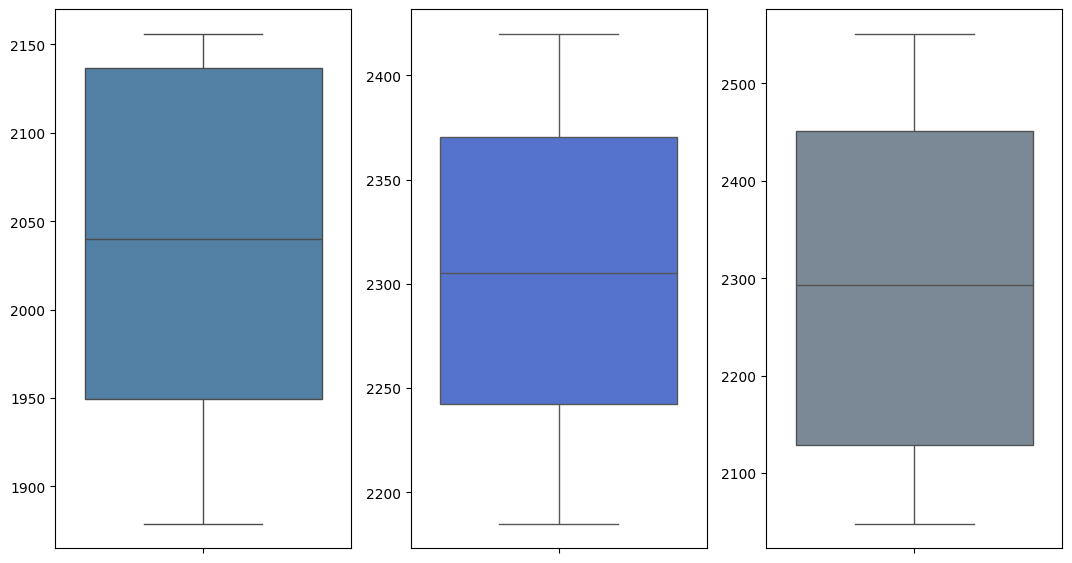

In [244]:
fig, axs = plt.subplots(ncols=3)
fig.set_figheight(7)
fig.set_figwidth(13)

sns.boxplot(data=youtube, ax=axs[0], color='#4582B4')

sns.boxplot(data=instagram, ax=axs[1], color='#4169E1')

sns.boxplot(data=facebook, ax=axs[2], color='#778899')

распределение нормальное
распределение нормальное
распределение нормальное
9.791198004087028e-09
выборки статистически различаются
4.504885518546452e-05
выборки статистически различаются
0.8082172017521337
различия незначительны


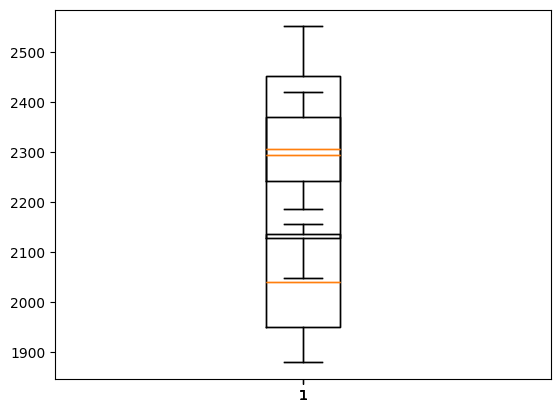

In [262]:
print(if_normal_popravka(youtube))
print(if_normal_popravka(instagram))
print(if_normal_popravka(facebook))

print(is_stat_dif_two(youtube, instagram, 0.05))
print(is_stat_dif_two(facebook, youtube, 0.05))
print(is_stat_dif_two(instagram, facebook, 0.05))